In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from statistics import mean, stdev

In [29]:
sns.set_style('darkgrid')
cmap=sns.light_palette("seagreen",as_cmap=True)
pd.set_option('display.float_format','{:.4f}'.format)

In [30]:
unfair = pd.read_csv('german-result/unfair_lr-100.csv', index_col=0)
zhang = pd.read_csv('german-result/zhang-100.csv', index_col=0)
laftr = pd.read_csv('german-result/laftr-100.csv', index_col=0)
beutel = pd.read_csv('german-result/beutel-100.csv', index_col=0)

In [31]:
unfair

,model_name,cv_seed,clas_acc,dp,deqodds,deqopp,trade_dp,trade_deqodds,trade_deqopp,TN_a0,FP_a0,FN_a0,TP_a0,TN_a1,FP_a1,FN_a1,TP_a1
0,UnfairLR-decay,13,0.7344,1.0000,1.0000,1.0000,0.8468,0.8468,0.8468,0.0000,26.0000,0.0000,58.0000,0.0000,42.0000,0.0000,130.0000
1,UnfairLR-decay,29,0.6602,1.0000,1.0000,1.0000,0.7953,0.7953,0.7953,0.0000,36.0000,0.0000,43.0000,0.0000,51.0000,0.0000,126.0000
2,UnfairLR-decay,42,0.7109,1.0000,1.0000,1.0000,0.8311,0.8311,0.8311,0.0000,22.0000,0.0000,52.0000,0.0000,52.0000,0.0000,130.0000
3,UnfairLR-decay,55,0.6953,1.0000,1.0000,1.0000,0.8203,0.8203,0.8203,0.0000,26.0000,0.0000,57.0000,0.0000,52.0000,0.0000,121.0000
4,UnfairLR-decay,73,0.7109,1.0000,1.0000,1.0000,0.8311,0.8311,0.8311,0.0000,30.0000,0.0000,49.0000,0.0000,44.0000,0.0000,133.0000
5,UnfairLR,13,0.7109,0.8295,0.7691,0.9393,0.7656,0.7389,0.8093,16.0000,10.0000,12.0000,46.0000,9.0000,33.0000,19.0000,111.0000
6,UnfairLR,29,0.6992,0.9288,0.9622,0.9472,0.7978,0.8099,0.8045,10.0000,26.0000,5.0000,38.0000,13.0000,38.0000,8.0000,118.0000
7,UnfairLR,42,0.7070,0.8662,0.8205,0.9346,0.7786,0.7595,0.8050,9.0000,13.0000,7.0000,45.0000,6.0000,46.0000,9.0000,121.0000
8,UnfairLR,55,0.7188,0.9113,0.9002,0.9350,0.8036,0.7993,0.8128,9.0000,17.0000,7.0000,50.0000,11.0000,41.0000,7.0000,114.0000
9,UnfairLR,73,0.7461,0.9554,0.9825,0.9710,0.8379,0.8481,0.8438,8.0000,22.0000,4.0000,45.0000,12.0000,32.0000,7.0000,126.0000


In [32]:
zhang

,model_name,cv_seed,clas_acc,dp,deqodds,deqopp,trade_dp,trade_deqodds,trade_deqopp,TN_a0,FP_a0,FN_a0,TP_a0,TN_a1,FP_a1,FN_a1,TP_a1
0,Zhang4DP,13,0.7188,0.7813,0.7251,0.8952,0.7487,0.7219,0.7973,19.0000,7.0000,15.0000,43.0000,12.0000,30.0000,20.0000,110.0000
1,Zhang4DP,29,0.7148,0.8867,0.9224,0.9478,0.7916,0.8055,0.8150,15.0000,21.0000,6.0000,37.0000,16.0000,35.0000,11.0000,115.0000
2,Zhang4DP,42,0.7148,0.8612,0.8208,0.9231,0.7812,0.7642,0.8057,10.0000,12.0000,8.0000,44.0000,9.0000,43.0000,10.0000,120.0000
3,Zhang4DP,55,0.7148,0.8742,0.8470,0.9247,0.7865,0.7753,0.8064,12.0000,14.0000,9.0000,48.0000,12.0000,40.0000,10.0000,111.0000
4,Zhang4DP,73,0.7461,0.9527,0.9737,0.9656,0.8368,0.8448,0.8418,9.0000,21.0000,5.0000,44.0000,14.0000,30.0000,9.0000,124.0000
5,Zhang4EqOdds,13,0.7227,0.7694,0.7059,0.8952,0.7453,0.7142,0.7997,20.0000,6.0000,15.0000,43.0000,12.0000,30.0000,20.0000,110.0000
6,Zhang4EqOdds,29,0.7188,0.8698,0.9047,0.9319,0.7871,0.8011,0.8116,15.0000,21.0000,6.0000,37.0000,15.0000,36.0000,9.0000,117.0000
7,Zhang4EqOdds,42,0.7109,0.8937,0.8570,0.9500,0.7919,0.7772,0.8133,9.0000,13.0000,7.0000,45.0000,9.0000,43.0000,11.0000,119.0000
8,Zhang4EqOdds,55,0.7188,0.8746,0.8420,0.9340,0.7891,0.7755,0.8124,12.0000,14.0000,8.0000,49.0000,11.0000,41.0000,9.0000,112.0000
9,Zhang4EqOdds,73,0.7461,0.9527,0.9737,0.9656,0.8368,0.8448,0.8418,9.0000,21.0000,5.0000,44.0000,14.0000,30.0000,9.0000,124.0000


In [33]:
laftr

,model_name,cv_seed,fair_coeff,clas_acc,dp,deqodds,deqopp,trade_dp,trade_deqodds,trade_deqopp,TN_a0,FP_a0,FN_a0,TP_a0,TN_a1,FP_a1,FN_a1,TP_a1
0,LAFTR4DP,13,0.2000,0.7227,0.8580,0.8242,0.9451,0.7845,0.7701,0.8190,17.0000,9.0000,13.0000,45.0000,15.0000,27.0000,22.0000,108.0000
1,LAFTR4DP,13,0.5000,0.7148,0.9106,0.8751,0.9992,0.8009,0.7869,0.8334,17.0000,9.0000,12.0000,46.0000,17.0000,25.0000,27.0000,103.0000
2,LAFTR4DP,13,0.7000,0.7188,0.9164,0.8870,0.9992,0.8056,0.7940,0.8361,17.0000,9.0000,12.0000,46.0000,18.0000,24.0000,27.0000,103.0000
3,LAFTR4DP,13,1.0000,0.7227,0.8984,0.8905,0.9586,0.8010,0.7978,0.8241,17.0000,9.0000,14.0000,44.0000,20.0000,22.0000,26.0000,104.0000
4,LAFTR4DP,29,0.2000,0.6914,0.8404,0.8739,0.8786,0.7586,0.7720,0.7738,16.0000,20.0000,10.0000,33.0000,16.0000,35.0000,14.0000,112.0000
5,LAFTR4DP,29,0.5000,0.6914,0.8840,0.9150,0.9330,0.7759,0.7877,0.7942,15.0000,21.0000,8.0000,35.0000,16.0000,35.0000,15.0000,111.0000
6,LAFTR4DP,29,0.7000,0.6875,0.8897,0.9190,0.9409,0.7756,0.7866,0.7945,15.0000,21.0000,8.0000,35.0000,16.0000,35.0000,16.0000,110.0000
7,LAFTR4DP,29,1.0000,0.6914,0.9023,0.9387,0.9330,0.7829,0.7963,0.7942,14.0000,22.0000,8.0000,35.0000,17.0000,34.0000,15.0000,111.0000
8,LAFTR4DP,42,0.2000,0.6758,0.9001,0.8781,0.9346,0.7720,0.7638,0.7844,9.0000,13.0000,11.0000,41.0000,12.0000,40.0000,19.0000,111.0000
9,LAFTR4DP,42,0.5000,0.6797,0.9216,0.9066,0.9462,0.7824,0.7769,0.7911,8.0000,14.0000,10.0000,42.0000,12.0000,40.0000,18.0000,112.0000


In [34]:
beutel

,model_name,cv_seed,fair_coeff,clas_acc,dp,deqodds,deqopp,trade_dp,trade_deqodds,trade_deqopp,TN_a0,FP_a0,FN_a0,TP_a0,TN_a1,FP_a1,FN_a1,TP_a1
0,BEUTEL4DP,13,1.0000,0.7118,0.9990,0.9911,0.9963,0.8313,0.8286,0.8304,1.0000,28.0000,2.0000,63.0000,1.0000,48.0000,5.0000,140.0000
1,BEUTEL4DP,29,1.0000,0.6736,1.0000,1.0000,1.0000,0.8050,0.8050,0.8050,0.0000,38.0000,0.0000,50.0000,0.0000,56.0000,0.0000,144.0000
2,BEUTEL4DP,42,1.0000,0.7014,1.0000,1.0000,1.0000,0.8245,0.8245,0.8245,0.0000,28.0000,0.0000,57.0000,0.0000,58.0000,0.0000,145.0000
3,BEUTEL4DP,55,1.0000,0.6979,1.0000,1.0000,1.0000,0.8221,0.8221,0.8221,0.0000,29.0000,0.0000,62.0000,0.0000,58.0000,0.0000,139.0000
4,BEUTEL4DP,73,1.0000,0.7083,1.0000,1.0000,1.0000,0.8293,0.8293,0.8293,0.0000,34.0000,0.0000,55.0000,0.0000,50.0000,0.0000,149.0000


## Acc mean and std

In [35]:
unfair_acc = unfair.groupby(['model_name'])['clas_acc'].agg([mean, stdev])
zhang_acc = zhang.groupby(['model_name'])['clas_acc'].agg([mean, stdev])
laftr_acc = laftr.groupby(['model_name', 'fair_coeff'])['clas_acc'].agg([mean, stdev])
beutel_acc = beutel.groupby(['model_name'])['clas_acc'].agg([mean, stdev])

In [36]:
acc = pd.concat([unfair_acc, zhang_acc, laftr_acc, beutel_acc])
acc = acc.reset_index()
acc = acc.rename(columns={'index': 'model_name'})
acc

,model_name,mean,stdev
0,UnfairLR,0.7164,0.0180
1,UnfairLR-decay,0.7023,0.0274
2,Zhang4DP,0.7219,0.0136
3,Zhang4EqOdds,0.7234,0.0134
4,Zhang4EqOpp,0.7219,0.0211
5,"(LAFTR4DP, 0.2)",0.7102,0.0286
6,"(LAFTR4DP, 0.5)",0.7070,0.0226
7,"(LAFTR4DP, 0.7)",0.7047,0.0239
8,"(LAFTR4DP, 1.0)",0.7063,0.0263
9,"(LAFTR4EqOdds, 0.2)",0.7086,0.0248


In [37]:
names = acc['model_name'].to_list()
for i in range(len(names)):
    if isinstance(names[i], tuple):
        names[i] = '-'.join([str(value) for value in names[i]])

names

['UnfairLR',
 'UnfairLR-decay',
 'Zhang4DP',
 'Zhang4EqOdds',
 'Zhang4EqOpp',
 'LAFTR4DP-0.2',
 'LAFTR4DP-0.5',
 'LAFTR4DP-0.7',
 'LAFTR4DP-1.0',
 'LAFTR4EqOdds-0.2',
 'LAFTR4EqOdds-0.5',
 'LAFTR4EqOdds-0.7',
 'LAFTR4EqOdds-1.0',
 'LAFTR4EqOpp-0.2',
 'LAFTR4EqOpp-0.5',
 'LAFTR4EqOpp-0.7',
 'LAFTR4EqOpp-1.0',
 'BEUTEL4DP']

In [38]:
acc['model_name'] = names
acc

,model_name,mean,stdev
0,UnfairLR,0.7164,0.0180
1,UnfairLR-decay,0.7023,0.0274
2,Zhang4DP,0.7219,0.0136
3,Zhang4EqOdds,0.7234,0.0134
4,Zhang4EqOpp,0.7219,0.0211
5,LAFTR4DP-0.2,0.7102,0.0286
6,LAFTR4DP-0.5,0.7070,0.0226
7,LAFTR4DP-0.7,0.7047,0.0239
8,LAFTR4DP-1.0,0.7063,0.0263
9,LAFTR4EqOdds-0.2,0.7086,0.0248


In [39]:
print((acc['mean'].round(4).astype(str) + ' $\pm$ ' + acc['stdev'].round(4).astype(str)).to_string(index=False))

  0.7164 $\pm$ 0.018
 0.7023 $\pm$ 0.0274
 0.7219 $\pm$ 0.0136
 0.7234 $\pm$ 0.0134
 0.7219 $\pm$ 0.0211
 0.7102 $\pm$ 0.0286
  0.707 $\pm$ 0.0226
 0.7047 $\pm$ 0.0239
 0.7062 $\pm$ 0.0263
 0.7086 $\pm$ 0.0248
 0.7086 $\pm$ 0.0248
 0.7086 $\pm$ 0.0248
 0.7086 $\pm$ 0.0248
 0.7047 $\pm$ 0.0282
 0.7047 $\pm$ 0.0282
 0.7047 $\pm$ 0.0282
 0.7047 $\pm$ 0.0282
  0.6986 $\pm$ 0.015


## Fairness mean and std

In [40]:
unfair_dp = unfair.groupby(['model_name'])['dp'].agg([mean, stdev])
zhang_dp = zhang.groupby(['model_name'])['dp'].agg([mean, stdev])
laftr_dp = laftr.groupby(['model_name', 'fair_coeff'])['dp'].agg([mean, stdev])
beutel_dp = beutel.groupby(['model_name'])['dp'].agg([mean, stdev])

In [41]:
dp = pd.concat([unfair_dp, zhang_dp, laftr_dp, beutel_dp])
dp = dp.reset_index()
dp = dp.rename(columns={'index': 'model_name'})
dp['model_name'] = names
dp

,model_name,mean,stdev
0,UnfairLR,0.8982,0.0503
1,UnfairLR-decay,1.0000,0.0000
2,Zhang4DP,0.8712,0.0614
3,Zhang4EqOdds,0.8720,0.0662
4,Zhang4EqOpp,0.8883,0.0673
5,LAFTR4DP-0.2,0.9107,0.0651
6,LAFTR4DP-0.5,0.9257,0.0310
7,LAFTR4DP-0.7,0.9340,0.0427
8,LAFTR4DP-1.0,0.9219,0.0322
9,LAFTR4EqOdds-0.2,0.9257,0.0314


In [42]:
print((dp['mean'].round(4).astype(str) + ' $\pm$ ' + dp['stdev'].round(4).astype(str)).to_string(index=False))

 0.8982 $\pm$ 0.0503
       1.0 $\pm$ 0.0
 0.8712 $\pm$ 0.0614
  0.872 $\pm$ 0.0662
 0.8883 $\pm$ 0.0673
 0.9107 $\pm$ 0.0651
  0.9257 $\pm$ 0.031
  0.934 $\pm$ 0.0427
 0.9219 $\pm$ 0.0322
 0.9257 $\pm$ 0.0314
 0.9257 $\pm$ 0.0314
 0.9257 $\pm$ 0.0314
 0.9257 $\pm$ 0.0314
  0.9191 $\pm$ 0.028
  0.9191 $\pm$ 0.028
  0.9191 $\pm$ 0.028
  0.9191 $\pm$ 0.028
 0.9998 $\pm$ 0.0004


In [43]:
unfair_deqodds = unfair.groupby(['model_name'])['deqodds'].agg([mean, stdev])
zhang_deqodds = zhang.groupby(['model_name'])['deqodds'].agg([mean, stdev])
laftr_deqodds = laftr.groupby(['model_name', 'fair_coeff'])['deqodds'].agg([mean, stdev])
beutel_deqodds = beutel.groupby(['model_name'])['deqodds'].agg([mean, stdev])

In [44]:
deqodds = pd.concat([unfair_deqodds, zhang_deqodds, laftr_deqodds, beutel_deqodds])
deqodds = deqodds.reset_index()
deqodds = deqodds.rename(columns={'index': 'model_name'})
deqodds['model_name'] = names
deqodds

,model_name,mean,stdev
0,UnfairLR,0.8869,0.0912
1,UnfairLR-decay,1.0000,0.0000
2,Zhang4DP,0.8578,0.0958
3,Zhang4EqOdds,0.8567,0.0987
4,Zhang4EqOpp,0.8679,0.0938
5,LAFTR4DP-0.2,0.8969,0.0567
6,LAFTR4DP-0.5,0.9108,0.0262
7,LAFTR4DP-0.7,0.9170,0.0474
8,LAFTR4DP-1.0,0.9119,0.0364
9,LAFTR4EqOdds-0.2,0.9140,0.0293


In [45]:
print((deqodds['mean'].round(4).astype(str) + ' $\pm$ ' + deqodds['stdev'].round(4).astype(str)).to_string(index=False))

 0.8869 $\pm$ 0.0912
       1.0 $\pm$ 0.0
 0.8578 $\pm$ 0.0958
 0.8567 $\pm$ 0.0987
 0.8679 $\pm$ 0.0938
 0.8969 $\pm$ 0.0567
 0.9108 $\pm$ 0.0262
  0.917 $\pm$ 0.0474
 0.9119 $\pm$ 0.0364
  0.914 $\pm$ 0.0293
  0.914 $\pm$ 0.0293
  0.914 $\pm$ 0.0293
  0.914 $\pm$ 0.0293
 0.9004 $\pm$ 0.0443
 0.9004 $\pm$ 0.0443
 0.9004 $\pm$ 0.0443
 0.9004 $\pm$ 0.0443
  0.9982 $\pm$ 0.004


In [46]:
unfair_deqopp = unfair.groupby(['model_name'])['deqopp'].agg([mean, stdev])
zhang_deqopp = zhang.groupby(['model_name'])['deqopp'].agg([mean, stdev])
laftr_deqopp = laftr.groupby(['model_name', 'fair_coeff'])['deqopp'].agg([mean, stdev])
beutel_deqopp = beutel.groupby(['model_name'])['deqopp'].agg([mean, stdev])

In [47]:
deqopp = pd.concat([unfair_deqopp, zhang_deqopp, laftr_deqopp, beutel_deqopp])
deqopp = deqopp.reset_index()
deqopp = deqopp.rename(columns={'index': 'model_name'})
deqopp['model_name'] = names
deqopp

,model_name,mean,stdev
0,UnfairLR,0.9454,0.0152
1,UnfairLR-decay,1.0000,0.0000
2,Zhang4DP,0.9313,0.0267
3,Zhang4EqOdds,0.9354,0.0262
4,Zhang4EqOpp,0.9413,0.0340
5,LAFTR4DP-0.2,0.9374,0.0376
6,LAFTR4DP-0.5,0.9583,0.0278
7,LAFTR4DP-0.7,0.9672,0.0279
8,LAFTR4DP-1.0,0.9479,0.0243
9,LAFTR4EqOdds-0.2,0.9538,0.0159


In [48]:
print((deqopp['mean'].round(4).astype(str) + ' $\pm$ ' + deqopp['stdev'].round(4).astype(str)).to_string(index=False))

 0.9454 $\pm$ 0.0152
       1.0 $\pm$ 0.0
 0.9313 $\pm$ 0.0267
 0.9354 $\pm$ 0.0262
  0.9413 $\pm$ 0.034
 0.9374 $\pm$ 0.0376
 0.9583 $\pm$ 0.0278
 0.9672 $\pm$ 0.0279
 0.9479 $\pm$ 0.0243
 0.9538 $\pm$ 0.0159
 0.9538 $\pm$ 0.0159
 0.9538 $\pm$ 0.0159
 0.9538 $\pm$ 0.0159
  0.945 $\pm$ 0.0276
  0.945 $\pm$ 0.0276
  0.945 $\pm$ 0.0276
  0.945 $\pm$ 0.0276
 0.9993 $\pm$ 0.0017


## Trade-offs mean and std

In [49]:
unfair_trade_dp = unfair.groupby(['model_name'])['trade_dp'].agg([mean, stdev])
zhang_trade_dp = zhang.groupby(['model_name'])['trade_dp'].agg([mean, stdev])
laftr_trade_dp = laftr.groupby(['model_name', 'fair_coeff'])['trade_dp'].agg([mean, stdev])
beutel_trade_dp = beutel.groupby(['model_name'])['trade_dp'].agg([mean, stdev])

In [50]:
trade_dp = pd.concat([unfair_trade_dp, zhang_trade_dp, laftr_trade_dp, beutel_trade_dp])
trade_dp = trade_dp.reset_index()
trade_dp = trade_dp.rename(columns={'index': 'model_name'})
trade_dp['model_name'] = names
trade_dp

,model_name,mean,stdev
0,UnfairLR,0.7967,0.0276
1,UnfairLR-decay,0.8249,0.0191
2,Zhang4DP,0.7890,0.0316
3,Zhang4EqOdds,0.7900,0.0324
4,Zhang4EqOpp,0.7960,0.0386
5,LAFTR4DP-0.2,0.7975,0.0383
6,LAFTR4DP-0.5,0.8016,0.0236
7,LAFTR4DP-0.7,0.8030,0.0257
8,LAFTR4DP-1.0,0.7995,0.0237
9,LAFTR4EqOdds-0.2,0.8025,0.0227


In [51]:
print((trade_dp['mean'].round(4).astype(str) + ' $\pm$ ' + trade_dp['stdev'].round(4).astype(str)).to_string(index=False))

 0.7967 $\pm$ 0.0276
 0.8249 $\pm$ 0.0191
  0.789 $\pm$ 0.0316
   0.79 $\pm$ 0.0324
  0.796 $\pm$ 0.0386
 0.7975 $\pm$ 0.0383
 0.8016 $\pm$ 0.0236
  0.803 $\pm$ 0.0257
 0.7995 $\pm$ 0.0237
 0.8025 $\pm$ 0.0227
 0.8025 $\pm$ 0.0227
 0.8025 $\pm$ 0.0227
 0.8025 $\pm$ 0.0227
 0.7976 $\pm$ 0.0261
 0.7976 $\pm$ 0.0261
 0.7976 $\pm$ 0.0261
 0.7976 $\pm$ 0.0261
 0.8224 $\pm$ 0.0104


In [52]:
unfair_trade_deqodds = unfair.groupby(['model_name'])['trade_deqodds'].agg([mean, stdev])
zhang_trade_deqodds = zhang.groupby(['model_name'])['trade_deqodds'].agg([mean, stdev])
laftr_trade_deqodds = laftr.groupby(['model_name', 'fair_coeff'])['trade_deqodds'].agg([mean, stdev])
beutel_trade_deqodds = beutel.groupby(['model_name'])['trade_deqodds'].agg([mean, stdev])

In [53]:
trade_deqodds = pd.concat([unfair_trade_deqodds, zhang_trade_deqodds, laftr_trade_deqodds, beutel_trade_deqodds])
trade_deqodds = trade_deqodds.reset_index()
trade_deqodds = trade_deqodds.rename(columns={'index': 'model_name'})
trade_deqodds['model_name'] = names
trade_deqodds

,model_name,mean,stdev
0,UnfairLR,0.7911,0.0430
1,UnfairLR-decay,0.8249,0.0191
2,Zhang4DP,0.7823,0.0460
3,Zhang4EqOdds,0.7825,0.0474
4,Zhang4EqOpp,0.7869,0.0501
5,LAFTR4DP-0.2,0.7921,0.0329
6,LAFTR4DP-0.5,0.7958,0.0169
7,LAFTR4DP-0.7,0.7963,0.0227
8,LAFTR4DP-1.0,0.7954,0.0175
9,LAFTR4EqOdds-0.2,0.7979,0.0174


In [54]:
print((trade_deqodds['mean'].round(4).astype(str) + ' $\pm$ ' + trade_deqodds['stdev'].round(4).astype(str)).to_string(index=False))

  0.7911 $\pm$ 0.043
 0.8249 $\pm$ 0.0191
  0.7823 $\pm$ 0.046
 0.7825 $\pm$ 0.0474
 0.7869 $\pm$ 0.0501
 0.7921 $\pm$ 0.0329
 0.7958 $\pm$ 0.0169
 0.7963 $\pm$ 0.0227
 0.7954 $\pm$ 0.0175
 0.7979 $\pm$ 0.0174
 0.7979 $\pm$ 0.0174
 0.7979 $\pm$ 0.0174
 0.7979 $\pm$ 0.0174
    0.79 $\pm$ 0.025
    0.79 $\pm$ 0.025
    0.79 $\pm$ 0.025
    0.79 $\pm$ 0.025
 0.8219 $\pm$ 0.0099


In [55]:
unfair_trade_deqopp = unfair.groupby(['model_name'])['trade_deqopp'].agg([mean, stdev])
zhang_trade_deqopp = zhang.groupby(['model_name'])['trade_deqopp'].agg([mean, stdev])
laftr_trade_deqopp = laftr.groupby(['model_name', 'fair_coeff'])['trade_deqopp'].agg([mean, stdev])
beutel_trade_deqopp = beutel.groupby(['model_name'])['trade_deqopp'].agg([mean, stdev])

In [56]:
trade_deqopp = pd.concat([unfair_trade_deqopp, zhang_trade_deqopp, laftr_trade_deqopp, beutel_trade_deqopp])
trade_deqopp = trade_deqopp.reset_index()
trade_deqopp = trade_deqopp.rename(columns={'index': 'model_name'})
trade_deqopp['model_name'] = names
trade_deqopp

,model_name,mean,stdev
0,UnfairLR,0.8151,0.0164
1,UnfairLR-decay,0.8249,0.0191
2,Zhang4DP,0.8132,0.0171
3,Zhang4EqOdds,0.8157,0.0156
4,Zhang4EqOpp,0.8170,0.0236
5,LAFTR4DP-0.2,0.8078,0.0272
6,LAFTR4DP-0.5,0.8135,0.0195
7,LAFTR4DP-0.7,0.8150,0.0182
8,LAFTR4DP-1.0,0.8092,0.0220
9,LAFTR4EqOdds-0.2,0.8128,0.0157


In [57]:
print((trade_deqopp['mean'].round(4).astype(str) + ' $\pm$ ' + trade_deqopp['stdev'].round(4).astype(str)).to_string(index=False))

 0.8151 $\pm$ 0.0164
 0.8249 $\pm$ 0.0191
 0.8132 $\pm$ 0.0171
 0.8157 $\pm$ 0.0156
  0.817 $\pm$ 0.0236
 0.8078 $\pm$ 0.0272
 0.8135 $\pm$ 0.0195
  0.815 $\pm$ 0.0182
  0.8092 $\pm$ 0.022
 0.8128 $\pm$ 0.0157
 0.8128 $\pm$ 0.0157
 0.8128 $\pm$ 0.0157
 0.8128 $\pm$ 0.0157
 0.8069 $\pm$ 0.0203
 0.8069 $\pm$ 0.0203
 0.8069 $\pm$ 0.0203
 0.8069 $\pm$ 0.0203
 0.8222 $\pm$ 0.0102


## t-test

In [58]:
unfair_lr, unfair_lr_decay = [x for _, x in unfair.groupby(['model_name'])]
zhang4dp, zhang4deqodds, zhang4deqopp = [x for _, x in zhang.groupby(['model_name'])]
(
    laftr4dp_02, laftr4dp_05, laftr4dp_07, laftr4dp_1, 
    laftr4deqodds_02, laftr4deqodds_05, laftr4deqodds_07, laftr4deqodds_1, 
    laftr4deqopp_02, laftr4deqopp_05, laftr4deqopp_07, laftr4deqopp_1
) = [x for _, x in laftr.groupby(['model_name', 'fair_coeff'])]
beutel4dp = [x for _, x in beutel.groupby(['model_name'])][0]

In [59]:
models = [
    unfair_lr, unfair_lr_decay,
    zhang4dp, zhang4deqodds, zhang4deqopp,
    laftr4dp_02, laftr4dp_05, laftr4dp_07, laftr4dp_1, 
    laftr4deqodds_02, laftr4deqodds_05, laftr4deqodds_07, laftr4deqodds_1, 
    laftr4deqopp_02, laftr4deqopp_05, laftr4deqopp_07, laftr4deqopp_1,
    beutel4dp
]

In [60]:
alpha = 0.05 # significance level
confidence = 1 - alpha # confidence level
l = len(models)

In [61]:
base_df = pd.DataFrame(index=names, columns=names, dtype=object)

### for accuracies

In [62]:
res_acc = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['clas_acc'], models[j]['clas_acc'])
        res_acc.iloc[i, j] = stat[1]

In [63]:
res_acc.values[[np.arange(res_acc.shape[0])]*2] = '-'
res_acc.T.fillna('')

<ipython-input-63-f271aa6f61ae>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_acc.values[[np.arange(res_acc.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0,BEUTEL4DP
UnfairLR,-,,,,,,,,,,,,,,,,,
UnfairLR-decay,0.3068,-,,,,,,,,,,,,,,,,
Zhang4DP,0.1836,0.1837,-,,,,,,,,,,,,,,,
Zhang4EqOdds,0.1369,0.1671,0.3739,-,,,,,,,,,,,,,,
Zhang4EqOpp,0.3627,0.2980,1.0000,0.7489,-,,,,,,,,,,,,,
LAFTR4DP-0.2,0.4382,0.6018,0.2386,0.1586,0.2587,-,,,,,,,,,,,,
LAFTR4DP-0.5,0.1360,0.7304,0.0756,0.0364,0.1135,0.3375,-,,,,,,,,,,,
LAFTR4DP-0.7,0.1191,0.8501,0.0542,0.0305,0.0972,0.1347,0.4263,-,,,,,,,,,,
LAFTR4DP-1.0,0.2347,0.7751,0.1061,0.0628,0.1419,0.1890,0.8276,0.3739,-,,,,,,,,,
LAFTR4EqOdds-0.2,0.3194,0.6115,0.1284,0.0795,0.2016,0.6885,0.7040,0.0341,0.2080,-,,,,,,,,


### for fairness

In [64]:
res_dp = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['dp'], models[j]['dp'])
        res_dp.iloc[i, j] = stat[1]

In [65]:
res_dp.values[[np.arange(res_dp.shape[0])]*2] = '-'
res_dp.T.fillna('')

<ipython-input-65-5ab64d67172f>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_dp.values[[np.arange(res_dp.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0,BEUTEL4DP
UnfairLR,-,,,,,,,,,,,,,,,,,
UnfairLR-decay,0.0106,-,,,,,,,,,,,,,,,,
Zhang4DP,0.0483,0.0094,-,,,,,,,,,,,,,,,
Zhang4EqOdds,0.1978,0.0124,0.9278,-,,,,,,,,,,,,,,
Zhang4EqOpp,0.5464,0.0206,0.0451,0.0110,-,,,,,,,,,,,,,
LAFTR4DP-0.2,0.6530,0.0374,0.1770,0.1760,0.3879,-,,,,,,,,,,,,
LAFTR4DP-0.5,0.2829,0.0059,0.0916,0.1037,0.2208,0.3992,-,,,,,,,,,,,
LAFTR4DP-0.7,0.2167,0.0259,0.0905,0.1075,0.1999,0.2155,0.3955,-,,,,,,,,,,
LAFTR4DP-1.0,0.2711,0.0056,0.0987,0.1323,0.2675,0.5734,0.6642,0.1516,-,,,,,,,,,
LAFTR4EqOdds-0.2,0.1686,0.0062,0.0475,0.0637,0.1499,0.3929,0.9995,0.4693,0.5844,-,,,,,,,,


In [66]:
res_deqodds = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['deqodds'], models[j]['deqodds'])
        res_deqodds.iloc[i, j] = stat[1]

In [67]:
res_deqodds.values[[np.arange(res_deqodds.shape[0])]*2] = '-'
res_deqodds.T.fillna('')

<ipython-input-67-950da47788eb>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_deqodds.values[[np.arange(res_deqodds.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0,BEUTEL4DP
UnfairLR,-,,,,,,,,,,,,,,,,,
UnfairLR-decay,0.0502,-,,,,,,,,,,,,,,,,
Zhang4DP,0.0502,0.0294,-,,,,,,,,,,,,,,,
Zhang4EqOdds,0.1944,0.0314,0.9141,-,,,,,,,,,,,,,,
Zhang4EqOpp,0.2010,0.0346,0.2845,0.3078,-,,,,,,,,,,,,,
LAFTR4DP-0.2,0.7601,0.0153,0.3029,0.2968,0.3979,-,,,,,,,,,,,,
LAFTR4DP-0.5,0.5410,0.0016,0.2454,0.2477,0.3037,0.4552,-,,,,,,,,,,,
LAFTR4DP-0.7,0.4714,0.0174,0.2459,0.2631,0.2979,0.3272,0.6552,-,,,,,,,,,,
LAFTR4DP-1.0,0.5502,0.0056,0.2831,0.2996,0.3444,0.5608,0.9195,0.6469,-,,,,,,,,,
LAFTR4EqOdds-0.2,0.4585,0.0028,0.2111,0.2316,0.2689,0.4407,0.7016,0.8117,0.7839,-,,,,,,,,


In [68]:
res_deqopp = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['deqopp'], models[j]['deqopp'])
        res_deqopp.iloc[i, j] = stat[1]

In [69]:
res_deqopp.values[[np.arange(res_deqopp.shape[0])]*2] = '-'
res_deqopp.T.fillna('')

<ipython-input-69-970c353c1324>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_deqopp.values[[np.arange(res_deqopp.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0,BEUTEL4DP
UnfairLR,-,,,,,,,,,,,,,,,,,
UnfairLR-decay,0.0013,-,,,,,,,,,,,,,,,,
Zhang4DP,0.1430,0.0046,-,,,,,,,,,,,,,,,
Zhang4EqOdds,0.3636,0.0053,0.5925,-,,,,,,,,,,,,,,
Zhang4EqOpp,0.7637,0.0182,0.4773,0.4806,-,,,,,,,,,,,,,
LAFTR4DP-0.2,0.6971,0.0204,0.8058,0.9236,0.8604,-,,,,,,,,,,,,
LAFTR4DP-0.5,0.4878,0.0286,0.3155,0.3743,0.5254,0.2130,-,,,,,,,,,,,
LAFTR4DP-0.7,0.2924,0.0583,0.2072,0.2297,0.3480,0.0871,0.0960,-,,,,,,,,,,
LAFTR4DP-1.0,0.8610,0.0087,0.4105,0.5351,0.7798,0.4266,0.3552,0.1358,-,,,,,,,,,
LAFTR4EqOdds-0.2,0.5330,0.0029,0.2396,0.2393,0.4786,0.2316,0.7156,0.2401,0.5999,-,,,,,,,,


### for trade-offs

In [70]:
res_trade_dp = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['trade_dp'], models[j]['trade_dp'])
        res_trade_dp.iloc[i, j] = stat[1]

In [71]:
res_trade_dp.values[[np.arange(res_trade_dp.shape[0])]*2] = '-'
res_trade_dp.T.fillna('')

<ipython-input-71-09fe37c19859>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_trade_dp.values[[np.arange(res_trade_dp.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0,BEUTEL4DP
UnfairLR,-,,,,,,,,,,,,,,,,,
UnfairLR-decay,0.1704,-,,,,,,,,,,,,,,,,
Zhang4DP,0.1282,0.1240,-,,,,,,,,,,,,,,,
Zhang4EqOdds,0.3218,0.1325,0.7134,-,,,,,,,,,,,,,,
Zhang4EqOpp,0.9187,0.2459,0.0993,0.1541,-,,,,,,,,,,,,,
LAFTR4DP-0.2,0.9493,0.1706,0.5523,0.6121,0.9227,-,,,,,,,,,,,,
LAFTR4DP-0.5,0.6309,0.0889,0.3615,0.4215,0.7230,0.5841,-,,,,,,,,,,,
LAFTR4DP-0.7,0.5848,0.1200,0.3651,0.4218,0.6872,0.4753,0.5015,-,,,,,,,,,,
LAFTR4DP-1.0,0.7681,0.0957,0.4390,0.5214,0.8242,0.8130,0.5261,0.3104,-,,,,,,,,,
LAFTR4EqOdds-0.2,0.5203,0.1029,0.2799,0.3501,0.6546,0.5538,0.7477,0.9038,0.3720,-,,,,,,,,


In [72]:
res_trade_deqodds = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['trade_deqodds'], models[j]['trade_deqodds'])
        res_trade_deqodds.iloc[i, j] = stat[1]

In [73]:
res_trade_deqodds.values[[np.arange(res_trade_deqodds.shape[0])]*2] = '-'
res_trade_deqodds.T.fillna('')

<ipython-input-73-89f6041a34a1>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_trade_deqodds.values[[np.arange(res_trade_deqodds.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0,BEUTEL4DP
UnfairLR,-,,,,,,,,,,,,,,,,,
UnfairLR-decay,0.2405,-,,,,,,,,,,,,,,,,
Zhang4DP,0.1618,0.1747,-,,,,,,,,,,,,,,,
Zhang4EqOdds,0.3306,0.1818,0.9562,-,,,,,,,,,,,,,,
Zhang4EqOpp,0.5452,0.2478,0.2642,0.3136,-,,,,,,,,,,,,,
LAFTR4DP-0.2,0.9427,0.1213,0.5659,0.5985,0.7790,-,,,,,,,,,,,,
LAFTR4DP-0.5,0.7669,0.0654,0.4845,0.5149,0.6680,0.6466,-,,,,,,,,,,,
LAFTR4DP-0.7,0.7611,0.0950,0.5132,0.5473,0.6799,0.6090,0.8900,-,,,,,,,,,,
LAFTR4DP-1.0,0.8077,0.0733,0.5397,0.5756,0.7110,0.7672,0.9357,0.8228,-,,,,,,,,,
LAFTR4EqOdds-0.2,0.6787,0.0797,0.4333,0.4749,0.6131,0.5708,0.6210,0.7573,0.4248,-,,,,,,,,


In [74]:
res_trade_deqopp = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['trade_deqopp'], models[j]['trade_deqopp'])
        res_trade_deqopp.iloc[i, j] = stat[1]

In [75]:
res_trade_deqopp.values[[np.arange(res_trade_deqopp.shape[0])]*2] = '-'
res_trade_deqopp.T.fillna('')

<ipython-input-75-91cf3e454cb3>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_trade_deqopp.values[[np.arange(res_trade_deqopp.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0,BEUTEL4DP
UnfairLR,-,,,,,,,,,,,,,,,,,
UnfairLR-decay,0.3721,-,,,,,,,,,,,,,,,,
Zhang4DP,0.6468,0.4025,-,,,,,,,,,,,,,,,
Zhang4EqOdds,0.8507,0.4634,0.2766,-,,,,,,,,,,,,,,
Zhang4EqOpp,0.7350,0.5804,0.4241,0.7670,-,,,,,,,,,,,,,
LAFTR4DP-0.2,0.4327,0.1628,0.6723,0.5169,0.5040,-,,,,,,,,,,,,
LAFTR4DP-0.5,0.8479,0.2058,0.9842,0.8401,0.8011,0.3671,-,,,,,,,,,,,
LAFTR4DP-0.7,0.9908,0.1825,0.8801,0.9460,0.8842,0.3099,0.3586,-,,,,,,,,,,
LAFTR4DP-1.0,0.4533,0.1941,0.7091,0.5488,0.5561,0.7983,0.2512,0.2517,-,,,,,,,,,
LAFTR4EqOdds-0.2,0.6583,0.1263,0.9612,0.7135,0.6876,0.4498,0.8695,0.5338,0.4718,-,,,,,,,,


## Plotting Accuracies

In [76]:
model_names = unfair['model_name'].to_list()
model_names += (laftr['model_name'] + '-' + laftr['fair_coeff'].astype(str)).to_list()
model_names += zhang['model_name'].to_list()

In [77]:
model_names

['UnfairLR-decay',
 'UnfairLR-decay',
 'UnfairLR-decay',
 'UnfairLR-decay',
 'UnfairLR-decay',
 'UnfairLR',
 'UnfairLR',
 'UnfairLR',
 'UnfairLR',
 'UnfairLR',
 'LAFTR4DP-0.2',
 'LAFTR4DP-0.5',
 'LAFTR4DP-0.7',
 'LAFTR4DP-1.0',
 'LAFTR4DP-0.2',
 'LAFTR4DP-0.5',
 'LAFTR4DP-0.7',
 'LAFTR4DP-1.0',
 'LAFTR4DP-0.2',
 'LAFTR4DP-0.5',
 'LAFTR4DP-0.7',
 'LAFTR4DP-1.0',
 'LAFTR4DP-0.2',
 'LAFTR4DP-0.5',
 'LAFTR4DP-0.7',
 'LAFTR4DP-1.0',
 'LAFTR4DP-0.2',
 'LAFTR4DP-0.5',
 'LAFTR4DP-0.7',
 'LAFTR4DP-1.0',
 'LAFTR4EqOdds-0.2',
 'LAFTR4EqOdds-0.5',
 'LAFTR4EqOdds-0.7',
 'LAFTR4EqOdds-1.0',
 'LAFTR4EqOdds-0.2',
 'LAFTR4EqOdds-0.5',
 'LAFTR4EqOdds-0.7',
 'LAFTR4EqOdds-1.0',
 'LAFTR4EqOdds-0.2',
 'LAFTR4EqOdds-0.5',
 'LAFTR4EqOdds-0.7',
 'LAFTR4EqOdds-1.0',
 'LAFTR4EqOdds-0.2',
 'LAFTR4EqOdds-0.5',
 'LAFTR4EqOdds-0.7',
 'LAFTR4EqOdds-1.0',
 'LAFTR4EqOdds-0.2',
 'LAFTR4EqOdds-0.5',
 'LAFTR4EqOdds-0.7',
 'LAFTR4EqOdds-1.0',
 'LAFTR4EqOpp-0.2',
 'LAFTR4EqOpp-0.5',
 'LAFTR4EqOpp-0.7',
 'LAFTR4EqOpp-1.0',


In [78]:
model_accs = unfair['clas_acc'].to_list()+laftr['clas_acc'].to_list()+zhang['clas_acc'].to_list()

No handles with labels found to put in legend.


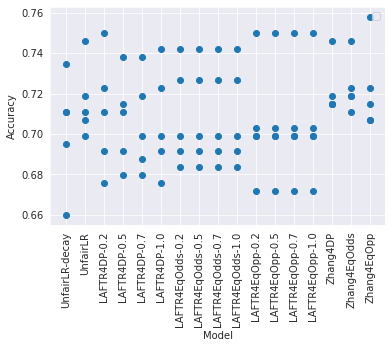

In [79]:
plt.plot()
plt.ylabel('Accuracy')

plt.scatter(model_names, model_accs)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Demographic Disparities

In [80]:
model_dps = unfair['dp'].to_list()+laftr['dp'].to_list()+zhang['dp'].to_list()

No handles with labels found to put in legend.


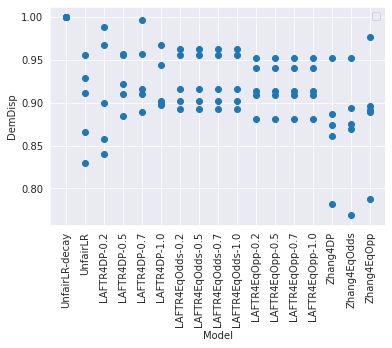

In [81]:
plt.plot()
plt.ylabel('DemDisp')

plt.scatter(model_names, model_dps)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Disparity in Equal Odds

No handles with labels found to put in legend.


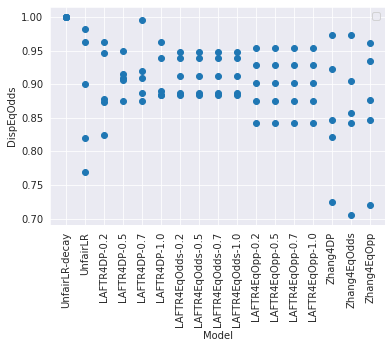

In [82]:
model_deqodds = unfair['deqodds'].to_list()+laftr['deqodds'].to_list()+zhang['deqodds'].to_list()
plt.plot()
plt.ylabel('DispEqOdds')

plt.scatter(model_names, model_deqodds)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Disparity in Equal Opp

No handles with labels found to put in legend.


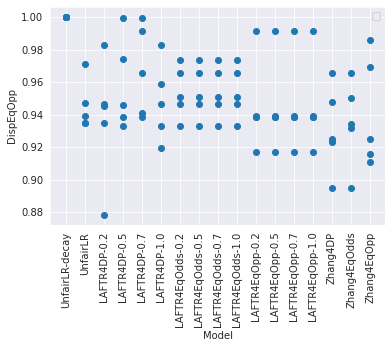

In [83]:
model_deqopps = unfair['deqopp'].to_list()+laftr['deqopp'].to_list()+zhang['deqopp'].to_list()
plt.plot()
plt.ylabel('DispEqOpp')

plt.scatter(model_names, model_deqopps)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Trade-off Acc-DemDisp

No handles with labels found to put in legend.


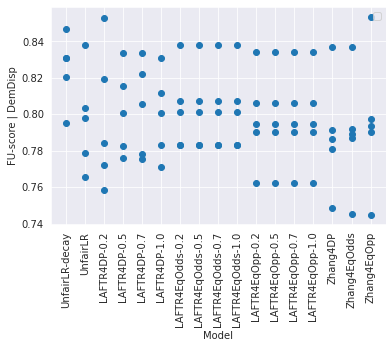

In [84]:
model_trade_dp = unfair['trade_dp'].to_list()+laftr['trade_dp'].to_list()+zhang['trade_dp'].to_list()
plt.plot()
plt.ylabel('FU-score | DemDisp')

plt.scatter(model_names, model_trade_dp)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Trade-off Acc-DispEqOdds

No handles with labels found to put in legend.


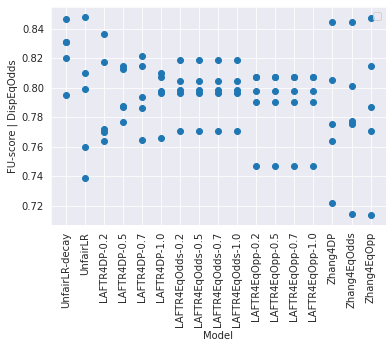

In [85]:
model_trade_deqodds = unfair['trade_deqodds'].to_list()+laftr['trade_deqodds'].to_list()+zhang['trade_deqodds'].to_list()
plt.plot()
plt.ylabel('FU-score | DispEqOdds')

plt.scatter(model_names, model_trade_deqodds)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Trade-off Acc-DispEqOpp

No handles with labels found to put in legend.


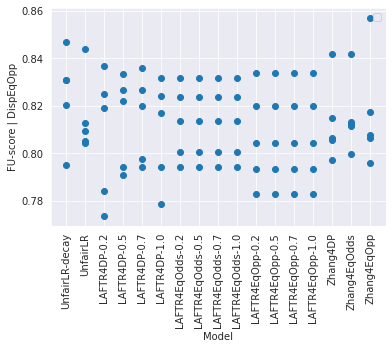

In [86]:
model_trade_deqopp = unfair['trade_deqopp'].to_list()+laftr['trade_deqopp'].to_list()+zhang['trade_deqopp'].to_list()
plt.plot()
plt.ylabel('FU-score | DispEqOpp')

plt.scatter(model_names, model_trade_deqopp)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Acc x DemDisp

In [87]:
'''cmap=sns.light_palette("seagreen")#,as_cmap=True)
cmap'''

'cmap=sns.light_palette("seagreen")#,as_cmap=True)\ncmap'

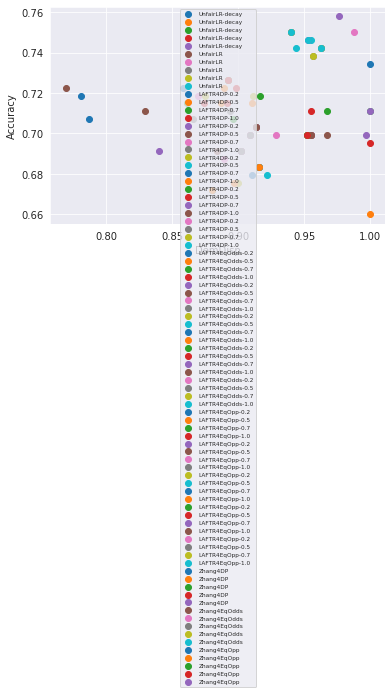

<Figure size 504x504 with 0 Axes>

In [88]:
plt.plot()
#sns.light_palette("seagreen",as_cmap=True)

#fig, ax = plt.scatter(model_dps, model_accs)#, label = "ZHANG DemPar")
'''fig, ax = plt.subplots()
ax.scatter(model_dps, model_accs)'''

plt.xlabel('DemDisp')
plt.ylabel('Accuracy')

for i, model_name in enumerate(model_names):
    plt.scatter(model_dps[i], model_accs[i], label=model_name)#, color=cmap[i])
plt.legend(loc='upper center', fontsize='xx-small')
plt.figure(figsize=(7,7))

plt.show()

## Plotting Acc x DispEqOdds

## Plotting Acc x DispEqOpp

# Pro artigo

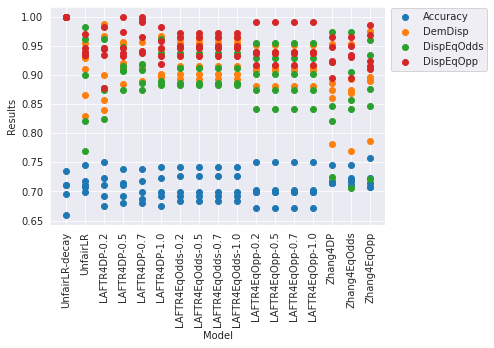

In [89]:

plt.plot()
plt.ylabel('Results')

plt.scatter(model_names, model_accs)
plt.scatter(model_names, model_dps)
plt.scatter(model_names, model_deqodds)
plt.scatter(model_names, model_deqopps)#, label = "ZHANG DemPar")


plt.xlabel('Model')
plt.xticks(rotation=90)
#plt.figure(figsize=(15,12))
#plt.yticks(range(0.755, 0.985))
#plt.yscale('log')
#plt.yticks([0.755, 0.80, 0.805, 0.81, 0.815, 0.82, 0.825, 0.83, 0.835, 0.84, 0.845, 0.85, 0.855, 0.86, 0.865, 0.87, 0.875, 0.88, 0.885, 0.89, 0.895, 0.90, 0.905, 0.91, 0.915, 0.92, 0.925, 0.93, 0.935, 0.94, 0.945, 0.95, 0.955, 0.96, 0.965, 0.97, 0.975,0.98, 0.985])
plt.legend(['Accuracy', 'DemDisp', 'DispEqOdds', 'DispEqOpp'], bbox_to_anchor=(1.32,1.02), loc="upper right")
plt.show()

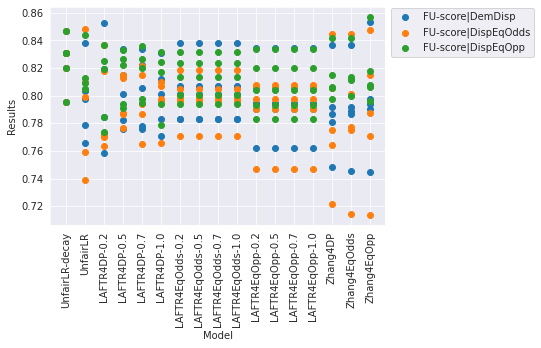

In [90]:

plt.plot()
plt.ylabel('Results')

plt.scatter(model_names, model_trade_dp)
plt.scatter(model_names, model_trade_deqodds)
plt.scatter(model_names, model_trade_deqopp)#, label = "ZHANG DemPar")


plt.xlabel('Model')
plt.xticks(rotation=90)
#plt.figure(figsize=(15,12))
#plt.yticks(range(0.755, 0.985))
#plt.yscale('log')
#plt.yticks([0.755, 0.80, 0.805, 0.81, 0.815, 0.82, 0.825, 0.83, 0.835, 0.84, 0.845, 0.85, 0.855, 0.86, 0.865, 0.87, 0.875, 0.88, 0.885, 0.89, 0.895, 0.90, 0.905, 0.91, 0.915, 0.92, 0.925, 0.93, 0.935, 0.94, 0.945, 0.95, 0.955, 0.96, 0.965, 0.97, 0.975,0.98, 0.985])
plt.legend(['FU-score|DemDisp', 'FU-score|DispEqOdds', 'FU-score|DispEqOpp'], bbox_to_anchor=(1.46,1.02), loc="upper right")
plt.show()